In [1]:
import geemap
import ee
from mpetools import IslandTime
import os
import pickle

try:
    ee.Initialize()

except Exception as e:
    ee.Authenticate()
    ee.Initialize()

%load_ext autoreload
%autoreload 2

In [3]:
def reduceRegionMean(img):

    # Calculate mean with ee.Reducer
    img_mean = img.reduceRegion(reducer=ee.Reducer.mean().unweighted(), geometry=polygon, scale=10000).get('temperature_2m')

    return img.set('date', img.date().format()).set('mean', img_mean)

collection_ERA5 = ee.ImageCollection('ECMWF/ERA5_LAND/DAILY_AGGR')
polygon = island_info['spatial_reference']['polygon']
collection = collection_ERA5.filterBounds(polygon).select('temperature_2m')
collection_mean = collection.map(reduceRegionMean)

In [ ]:
polygon

In [17]:
polygon.getInfo()['coordinates'][0]

[[179.07725059999999, -8.4666771],
 [179.0825014, -8.4666771],
 [179.0825014, -8.459047400000001],
 [179.07725059999999, -8.459047400000001],
 [179.07725059999999, -8.4666771]]

In [5]:
IslandTime.TimeSeriesERA5('Tepuka', 'Tuvalu', overwrite=True).main()


-------------------------------------------------------------------
Retrieving all information available for the island.
Island: Tepuka, Tuvalu
-------------------------------------------------------------------

~ The following information is available: ~

general_info
               island
               country
               part of
               located in or next to body of water
               country_ID
spatial_reference
               latitude
               longitude
               polygon
               polygon_OSM
               reference_shoreline
               transects
image_collection_dict
               description
               S2
               L7
               L8
               L9
timeseries_CRW
               description
               description_timeseries
               source
               timeseries
timeseries_nighttime_light
               description
               description_timeseries
               source
timeseries_disasters
               descrip

TypeError: no numeric data to plot

In [2]:
#IslandTime.run_all('Gaadhoo', 'Maldives')
island_info = IslandTime.retrieve_island_info('Tepuka', 'Tuvalu')


-------------------------------------------------------------------
Retrieving all information available for the island.
Island: Tepuka, Tuvalu
-------------------------------------------------------------------

~ The following information is available: ~

general_info
               island
               country
               part of
               located in or next to body of water
               country_ID
spatial_reference
               latitude
               longitude
               polygon
               polygon_OSM
               reference_shoreline
               transects
image_collection_dict
               description
               S2
               L7
               L8
               L9
timeseries_CRW
               description
               description_timeseries
               source
               timeseries
timeseries_nighttime_light
               description
               description_timeseries
               source
timeseries_disasters
               descrip

In [7]:
polygon = island_info['spatial_reference']['polygon'].getInfo()['coordinates'][0]
area = [max([polygon[0][1], polygon[2][1]]), min([polygon[0][0], polygon[2][0]])+180, min([polygon[0][1], polygon[2][1]]), max([polygon[0][0], polygon[2][0]])+180]
area

[0.4839025, 253.5485622, 0.4688858, 253.5615621]

In [9]:
IslandTime.TimeSeriesWaveEnergy('Dhiyadhoo', 'Maldives', overwrite=True).main()


-------------------------------------------------------------------
Retrieving all information available for the island.
Island: Dhiyadhoo, Maldives
-------------------------------------------------------------------

~ The following information is available: ~

general_info
               island
               country
               part of
               located in the administrative territorial entity
               located in or next to body of water
               atoll
spatial_reference
               latitude
               longitude
               polygon
               polygon_OSM
               transects_ECU_characteristics
               reference_shoreline
               transects
image_collection_dict
               description
               S2
               L7
               L8
               L9
timeseries_vegetation
               description
               description_timeseries
               source
               mask_total_vegetation_S2
               mask_coastal

2023-09-01 14:31:10,440 INFO Welcome to the CDS
2023-09-01 14:31:10,441 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-09-01 14:31:10,501 INFO Request is queued
2023-09-01 14:31:11,544 INFO Request is running
2023-09-01 14:33:04,252 INFO Request is completed
2023-09-01 14:33:05,369 INFO Welcome to the CDS
2023-09-01 14:33:05,370 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-09-01 14:33:05,436 INFO Request is queued
2023-09-01 14:33:06,477 INFO Request is running
2023-09-01 14:34:59,176 INFO Request is completed


In [13]:
islands = ['Fualopa', 'Fuafatu', 'Amatuku']
country = 'Tuvalu'

for island in islands:
    island_info = IslandTime.run_all(island, country)


-------------------------------------------------------------------
Retrieving general and spatial information about the island
Island: Fualopa, Tuvalu
-------------------------------------------------------------------

~ All information is already available, returning information. ~

-------------------------------------------------------------------
Retrieving Sea surface temperature (NOAA Coral Reef Watch)
Island: Fualopa, Tuvalu
-------------------------------------------------------------------

~ Information already available. Returning data. ~

-------------------------------------------------------------------
Retrieving Nighttime light (DMSP-OLS)
Island: Fualopa, Tuvalu
-------------------------------------------------------------------

~ Retrieving NTL time series. ~
Time series is empty!

-------------------------------------------------------------------
Retrieving Disasters (EM-DAT)
Island: Fualopa, Tuvalu
----------------------------------------------------------------

In [10]:
polygon = [[[73.434316, 0.664876], 
            [73.434316, 0.653023],
            [73.443429, 0.653023],
            [73.443429, 0.664876],
            [73.434316, 0.664876]]] 

polygon_gee = ee.Geometry.Polygon(polygon)

island_info['spatial_reference']['polygon'] = polygon_gee

In [19]:
with open(os.path.join(os.getcwd(), 'data', 'info_islands', 'info_{}_{}.data'.format(island, country)), 'wb') as f:
    pickle.dump(island_info, f)

In [11]:
'''
polygon = [[[166.905418, -0.528960], 
            [166.905418, -0.540194],
            [166.915109, -0.540194],
            [166.915109, -0.528960],
            [166.905418, -0.528960]]]

polygon_gee = ee.Geometry.Polygon(polygon)
'''
polygon_gee = island_info['spatial_reference']['polygon']
#polygon_gee = ee.Geometry.Polygon([new_arr.tolist()])

imageColl = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterBounds(polygon_gee).select('B4', 'B3', 'B2').first()
print(imageColl.getInfo())

m = geemap.Map(center=[island_info['spatial_reference']['latitude'], island_info['spatial_reference']['longitude']], zoom=11)
m.addLayer(imageColl.clip(polygon_gee), vis_params={})
m

{'type': 'Image', 'bands': [{'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32643', 'crs_transform': [10, 0, 300000, 0, -10, 100020]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32643', 'crs_transform': [10, 0, 300000, 0, -10, 100020]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32643', 'crs_transform': [10, 0, 300000, 0, -10, 100020]}], 'version': 1694615248118778, 'id': 'COPERNICUS/S2_SR_HARMONIZED/20181218T053711_20181218T053707_T43NCA', 'properties': {'DATATAKE_IDENTIFIER': 'GS2A_20181218T053711_018220_N02.11', 'AOT_RETRIEVAL_ACCURACY': 0, 'SPACECRAFT_NAME': 'Sentinel-2A', 'SATURATED_DEFECTIVE_PIXEL_PERCENTAGE': 0, 'MEAN_INCIDENCE_AZIMUTH_ANGLE_B8A': 285.352075842, 'CLOUD_SHADOW_PERCENTAGE': 0.002124, 'MEAN_SOLAR

Map(center=[1.82142215, 73.45173222640615], controls=(WidgetControl(options=['position', 'transparent_bg'], wi…

In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
per = 0.001

In [118]:
xx = np.array([np.sign(original_coords[i, 0] - island_info['spatial_reference']['longitude']) * 0.005 + original_coords[i, 0] for i in range(len(original_coords[:, 0]))])
yy = np.array([np.sign(original_coords[i, 1] - island_info['spatial_reference']['latitude']) * 0.005 + original_coords[i, 1] for i in range(len(original_coords[:, 1]))])

new_arr = np.column_stack((xx, yy))

In [96]:
xx

array([73.3318924, 73.4835063, 73.4835063, 73.3318924, 73.3318924])

In [99]:
per * original_coords[:, 0]

array([0.0734053, 0.0734101, 0.0734101, 0.0734053, 0.0734053])

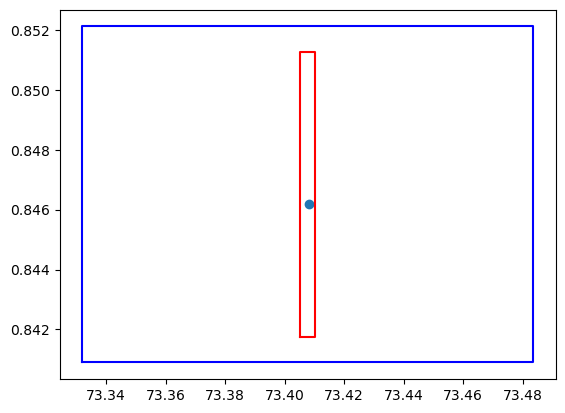

In [95]:
plt.plot(original_coords[:, 0], original_coords[:, 1], 'r-')
plt.plot(new_arr[:, 0], new_arr[:, 1], 'b-')
plt.scatter(island_info['spatial_reference']['longitude'], island_info['spatial_reference']['latitude'])